<a href="https://colab.research.google.com/github/Fragoa/Transfer-Learning-Fine-Tuning-with-ImageNet/blob/main/main_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("--- VGG16 Model Summary (excluding top layers) ---")
vgg16_base.summary()

print("\n--- ResNet50 Model Summary (excluding top layers) ---")
resnet50_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
--- VGG16 Model Summary (excluding top layers) ---


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


--- ResNet50 Model Summary (excluding top layers) ---


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Load MNIST dataset
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()


print(f"Original x_train_raw shape: {x_train_raw.shape}")
print(f"Original y_train_raw shape: {y_train_raw.shape}")
print(f"Original x_test_raw shape: {x_test_raw.shape}")
print(f"Original y_test_raw shape: {y_test_raw.shape}")

# Convert labels to one-hot encoding (essential for categorical_crossentropy loss)
y_train_one_hot = tf.keras.utils.to_categorical(y_train_raw, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_raw, num_classes=10)

print(f"y_train one-hot shape: {y_train_one_hot.shape}")
print(f"y_test one-hot shape: {y_test_one_hot.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original x_train_raw shape: (60000, 28, 28)
Original y_train_raw shape: (60000,)
Original x_test_raw shape: (10000, 28, 28)
Original y_test_raw shape: (10000,)
y_train one-hot shape: (60000, 10)
y_test one-hot shape: (10000, 10)


In [ ]:
# Desired input size for ImageNet models
IMG_SIZE = 224

In [ ]:
def efficient_preprocess_mnist_image(image, label, preprocess_func):
    """
    Efficiently resizes a grayscale MNIST image to target_size, converts to RGB,
    and applies ImageNet-specific preprocessing using TensorFlow operations.
    """
    # Cast to float32 (important for image operations and normalization)
    image = tf.cast(image, tf.float32)

    # Add channel dimension (28, 28) -> (28, 28, 1)
    image = tf.expand_dims(image, axis=-1)

    # Convert to RGB by repeating the single channel 3 times
    # (28, 28, 1) -> (28, 28, 3)
    image = tf.repeat(image, 3, axis=-1)

    # Resize image
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

    # Apply the specific preprocessing for the model (e.g., VGG16 or ResNet50)
    preprocessed_image = preprocess_func(image)

    return preprocessed_image, label # Return the preprocessed image and its label


In [ ]:
BATCH_SIZE = 32 # You can adjust this based on your GPU memory

# --- Create Training Datasets ---
train_dataset_vgg16 = tf.data.Dataset.from_tensor_slices((x_train_raw, y_train_one_hot))
train_dataset_resnet50 = tf.data.Dataset.from_tensor_slices((x_train_raw, y_train_one_hot))

# Apply preprocessing using map(), then shuffle and batch
train_dataset_vgg16 = train_dataset_vgg16.map(
    lambda img, lbl: efficient_preprocess_mnist_image(img, lbl, vgg16_preprocess_input),
    num_parallel_calls=tf.data.AUTOTUNE # Optimize parallelism
).shuffle(buffer_size=1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_resnet50 = train_dataset_resnet50.map(
    lambda img, lbl: efficient_preprocess_mnist_image(img, lbl, resnet50_preprocess_input),
    num_parallel_calls=tf.data.AUTOTUNE
).shuffle(buffer_size=1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
# --- Create Test Datasets ---
test_dataset_vgg16 = tf.data.Dataset.from_tensor_slices((x_test_raw, y_test_one_hot))
test_dataset_resnet50 = tf.data.Dataset.from_tensor_slices((x_test_raw, y_test_one_hot))

test_dataset_vgg16 = test_dataset_vgg16.map(
    lambda img, lbl: efficient_preprocess_mnist_image(img, lbl, vgg16_preprocess_input),
    num_parallel_calls=tf.data.AUTOTUNE
).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) # No shuffle for test set

test_dataset_resnet50 = test_dataset_resnet50.map(
    lambda img, lbl: efficient_preprocess_mnist_image(img, lbl, resnet50_preprocess_input),
    num_parallel_calls=tf.data.AUTOTUNE
).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print("TensorFlow Datasets created for VGG16 and ResNet50 preprocessing.")
print(f"Example batch size: {BATCH_SIZE}")
print("Data will be preprocessed on-the-fly, saving RAM.")

TensorFlow Datasets created for VGG16 and ResNet50 preprocessing.
Example batch size: 32
Data will be preprocessed on-the-fly, saving RAM.


In [ ]:
# Get one batch from the VGG16 training dataset to check its structure
for image_batch, label_batch in train_dataset_vgg16.take(1):
    print(f"\nShape of one image batch from VGG16 dataset: {image_batch.shape}")
    print(f"Data type of one image batch from VGG16 dataset: {image_batch.dtype}")
    print(f"Shape of one label batch from VGG16 dataset: {label_batch.shape}")
    print(f"Data type of one label batch from VGG16 dataset: {label_batch.dtype}")
    # Example pixel values (will be centered around 0 due to VGG16 preprocessing)
    print("Example pixel values (VGG16 preprocessed):", image_batch[0, 100, 100, :].numpy())
    break # Only take one batch


Shape of one image batch from VGG16 dataset: (32, 224, 224, 3)
Data type of one image batch from VGG16 dataset: <dtype: 'float32'>
Shape of one label batch from VGG16 dataset: (32, 10)
Data type of one label batch from VGG16 dataset: <dtype: 'float64'>
Example pixel values (VGG16 preprocessed): [121.791466 108.95147  102.05047 ]


In [ ]:
# Get one batch from the ResNet50 training dataset to check its structure
for image_batch, label_batch in train_dataset_resnet50.take(1):
    print(f"\nShape of one image batch from ResNet50 dataset: {image_batch.shape}")
    print(f"Data type of one image batch from ResNet50 dataset: {image_batch.dtype}")
    print(f"Shape of one label batch from ResNet50 dataset: {label_batch.shape}")
    print(f"Data type of one label batch from ResNet50 dataset: {label_batch.dtype}")
    # Example pixel values (will be centered around 0, usually between -1 and 1 for ResNet50)
    print("Example pixel values (ResNet50 preprocessed):", image_batch[0, 100, 100, :].numpy())
    break # Only take one batch


Shape of one image batch from ResNet50 dataset: (32, 224, 224, 3)
Data type of one image batch from ResNet50 dataset: <dtype: 'float32'>
Shape of one label batch from ResNet50 dataset: (32, 10)
Data type of one label batch from ResNet50 dataset: <dtype: 'float64'>
Example pixel values (ResNet50 preprocessed): [ -96.61869 -109.45869 -116.35969]


In [ ]:
# Function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Store results for comparison
results = {}

--- VGG16: Feature Extraction (Frozen Backbone) ---


Model: "VGG16_MNIST_Feature_Extraction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG16 Feature Extraction model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 387s 199ms/step - accuracy: 0.8427 - loss: 0.9974 - val_accuracy: 0.9839 - val_loss: 0.0624
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 433s 200ms/step - accuracy: 0.9442 - loss: 0.2161 - val_accuracy: 0.9866 - val_loss: 0.0568
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 383s 201ms/step - accuracy: 0.9589 - loss: 0.1514 - val_accuracy: 0.9874 - val_loss: 0.0597
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 378s 201ms/step - accuracy: 0.9698 - loss: 0.1159 - val_accuracy: 0.9889 - val_loss: 0.0588
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 382s 201ms/step - accuracy: 0.9731 - loss: 0.1014 - val_accuracy: 0.9879 - val_loss: 0.0615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 382s 201ms/step - accuracy: 0.9754 - loss: 0.0922 - val_accuracy: 0.9903 - val_loss: 0.0520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 379s 201ms/step - accuracy: 0.9767 - loss: 0.0864 - val_accuracy: 0.9896 - val_loss: 0.0590
Epoch 8/10
1875/18

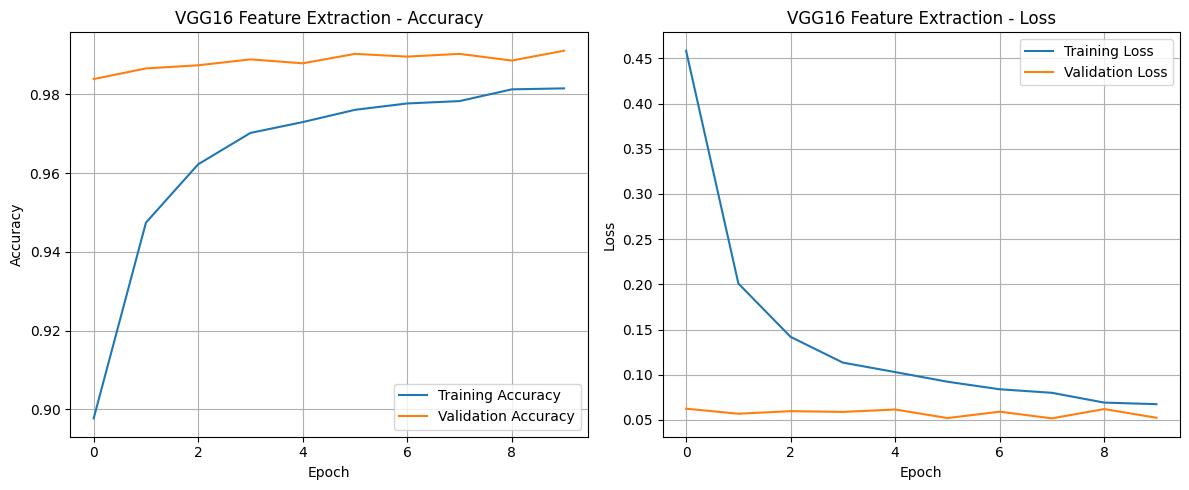

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.9889 - loss: 0.0627
VGG16 Feature Extraction Test Accuracy: 0.9911
VGG16 Feature Extraction Test Loss: 0.0524


In [ ]:
print("--- VGG16: Feature Extraction (Frozen Backbone) ---")

# 1. Modify Model: Add new FC layer and freeze base
vgg16_fe_model = Model(inputs=vgg16_base.input, outputs=vgg16_base.output, name="VGG16_Feature_Extractor_Base")

# Freeze all layers in the base model
for layer in vgg16_fe_model.layers:
    layer.trainable = False

# Add new classification head
x = Flatten()(vgg16_fe_model.output)
x = Dense(256, activation='relu')(x) # Added a hidden Dense layer for better feature mapping
x = Dropout(0.5)(x) # Dropout for regularization
output = Dense(10, activation='softmax')(x) # 10 classes for MNIST

model_vgg16_fe = Model(inputs=vgg16_fe_model.input, outputs=output, name="VGG16_MNIST_Feature_Extraction")

# Compile the model
# Using a slightly higher learning rate for the new layers, as they are trained from scratch
optimizer_fe = SGD(learning_rate=0.001, momentum=0.9)
model_vgg16_fe.compile(optimizer=optimizer_fe,
                       loss=CategoricalCrossentropy(),
                       metrics=['accuracy'])

model_vgg16_fe.summary()

# 2. Training
print("\nTraining VGG16 Feature Extraction model...")
history_vgg16_fe = model_vgg16_fe.fit(
    train_dataset_vgg16,
    epochs=10, # Increased to 10 for better convergence observation
    validation_data=test_dataset_vgg16
)

# Output: Training curves
plot_training_history(history_vgg16_fe, "VGG16 Feature Extraction")

# Evaluate performance
loss_vgg16_fe, accuracy_vgg16_fe = model_vgg16_fe.evaluate(test_dataset_vgg16)
results['VGG16_FeatureExtraction'] = {'accuracy': accuracy_vgg16_fe, 'loss': loss_vgg16_fe}
print(f"VGG16 Feature Extraction Test Accuracy: {accuracy_vgg16_fe:.4f}")
print(f"VGG16 Feature Extraction Test Loss: {loss_vgg16_fe:.4f}")


--- ResNet50: Feature Extraction (Frozen Backbone) ---


Model: "ResNet50_MNIST_Feature_Extraction"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,280,650 (187.99 MB)

 Trainable params: 25,692,938 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Training ResNet50 Feature Extraction model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 216s 107ms/step - accuracy: 0.8019 - loss: 0.6518 - val_accuracy: 0.9854 - val_loss: 0.0510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 209s 110ms/step - accuracy: 0.9086 - loss: 0.2667 - val_accuracy: 0.9826 - val_loss: 0.0635
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 192s 101ms/step - accuracy: 0.9320 - loss: 0.1998 - val_accuracy: 0.9877 - val_loss: 0.0471
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 218s 110ms/step - accuracy: 0.9430 - loss: 0.1703 - val_accuracy: 0.9909 - val_loss: 0.0348
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 110ms/step - accuracy: 0.9467 - loss: 0.1544 - val_accuracy: 0.9905 - val_loss: 0.0374
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 193s 101ms/step - accuracy: 0.9532 - loss: 0.1395 - val_accuracy: 0.9909 - val_loss: 0.0350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 208s 110ms/step - accuracy: 0.9590 - loss: 0.1204 - val_accuracy: 0.9902 - val_loss: 0.0377
Epoch 8/10
1875

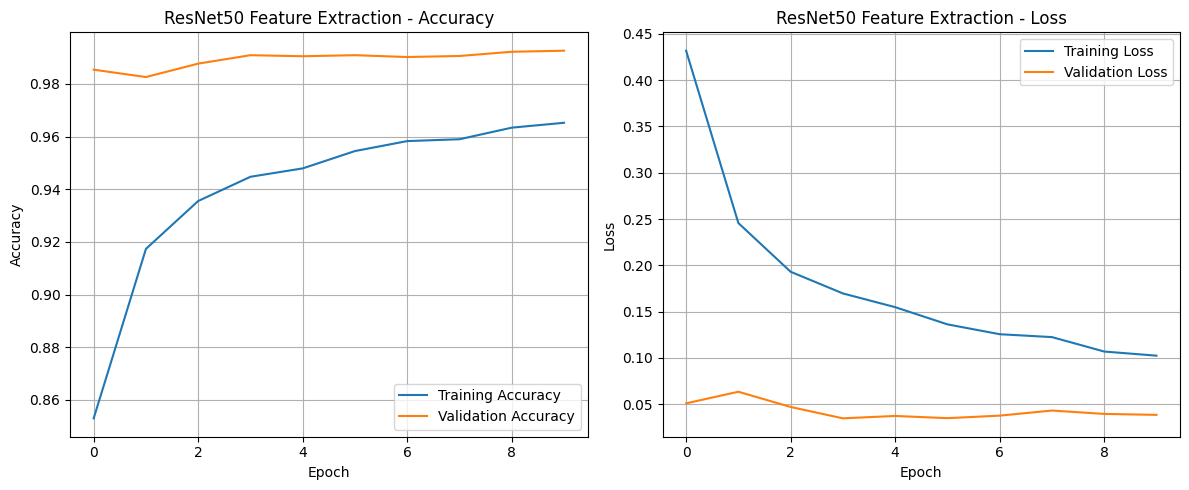

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9910 - loss: 0.0490
ResNet50 Feature Extraction Test Accuracy: 0.9926
ResNet50 Feature Extraction Test Loss: 0.0385


In [ ]:
print("\n--- ResNet50: Feature Extraction (Frozen Backbone) ---")

# 1. Modify Model: Add new FC layer and freeze base
resnet50_fe_model = Model(inputs=resnet50_base.input, outputs=resnet50_base.output, name="ResNet50_Feature_Extractor_Base")

# Freeze all layers in the base model
for layer in resnet50_fe_model.layers:
    layer.trainable = False

# Add new classification head
x = Flatten()(resnet50_fe_model.output)
x = Dense(256, activation='relu')(x) # Added a hidden Dense layer
x = Dropout(0.5)(x) # Dropout for regularization
output = Dense(10, activation='softmax')(x) # 10 classes for MNIST

model_resnet50_fe = Model(inputs=resnet50_fe_model.input, outputs=output, name="ResNet50_MNIST_Feature_Extraction")

# Compile the model
optimizer_fe = SGD(learning_rate=0.001, momentum=0.9)
model_resnet50_fe.compile(optimizer=optimizer_fe,
                          loss=CategoricalCrossentropy(),
                          metrics=['accuracy'])

model_resnet50_fe.summary()

# 2. Training
print("\nTraining ResNet50 Feature Extraction model...")
history_resnet50_fe = model_resnet50_fe.fit(
    train_dataset_resnet50,
    epochs=10, # Increased to 10 for better convergence observation
    validation_data=test_dataset_resnet50
)

# Output: Training curves
plot_training_history(history_resnet50_fe, "ResNet50 Feature Extraction")

# Evaluate performance
loss_resnet50_fe, accuracy_resnet50_fe = model_resnet50_fe.evaluate(test_dataset_resnet50)
results['ResNet50_FeatureExtraction'] = {'accuracy': accuracy_resnet50_fe, 'loss': loss_resnet50_fe}
print(f"ResNet50 Feature Extraction Test Accuracy: {accuracy_resnet50_fe:.4f}")
print(f"ResNet50 Feature Extraction Test Loss: {loss_resnet50_fe:.4f}")


--- VGG16: Fine-Tuning (Unfreeze Last Block) ---
VGG16 layers trainability after unfreezing:
input_layer_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True


Model: "VGG16_MNIST_Fine_Tuning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 13,504,778 (51.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)


Training VGG16 Fine-Tuning model...
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 431s 226ms/step - accuracy: 0.8074 - loss: 0.9510 - val_accuracy: 0.9865 - val_loss: 0.0471
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 437s 226ms/step - accuracy: 0.9668 - loss: 0.1107 - val_accuracy: 0.9894 - val_loss: 0.0368
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 391s 208ms/step - accuracy: 0.9785 - loss: 0.0714 - val_accuracy: 0.9904 - val_loss: 0.0327
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 426s 226ms/step - accuracy: 0.9817 - loss: 0.0585 - val_accuracy: 0.9907 - val_loss: 0.0308
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 407s 208ms/step - accuracy: 0.9839 - loss: 0.0496 - val_accuracy: 0.9906 - val_loss: 0.0296
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 426s 226ms/step - accuracy: 0.9872 - loss: 0.0397 - val_accuracy: 0.9912 - val_loss: 0.0285
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 426s 226ms/step - accuracy: 0.9881 - loss: 0.0362 - val_accuracy: 0.9917 - val_loss: 0.0278
Epoch 8/20
1875/1875 ━━━━

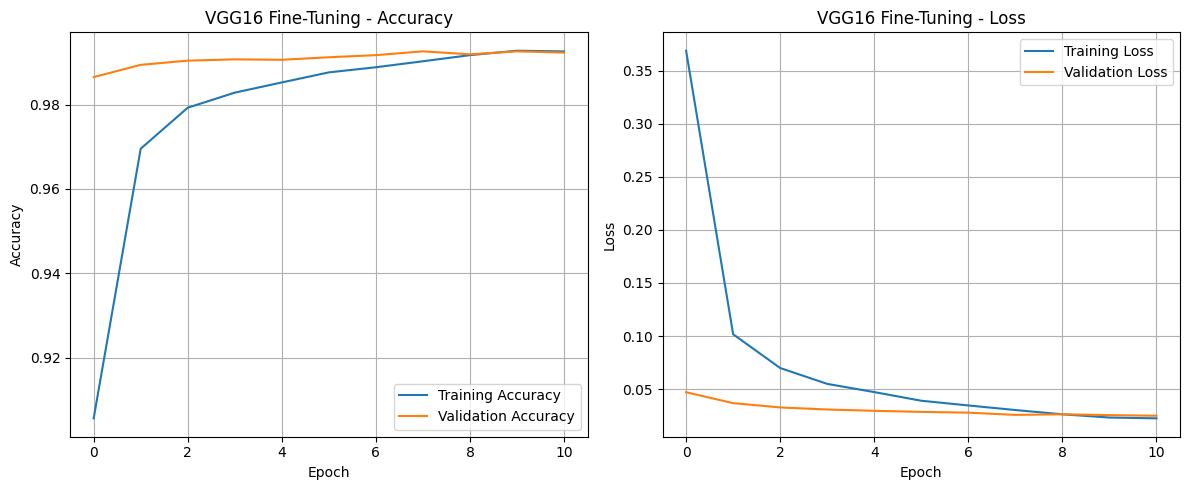

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.9906 - loss: 0.0303
VGG16 Fine-Tuning Test Accuracy: 0.9926
VGG16 Fine-Tuning Test Loss: 0.0257


In [ ]:
print("\n--- VGG16: Fine-Tuning (Unfreeze Last Block) ---")

# Create a new model instance from the base, don't re-use the frozen one directly
# as we need to modify trainability.
# A common practice is to create the full model and then set trainability.
fine_tune_model_vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze all layers initially
for layer in fine_tune_model_vgg16_base.layers:
    layer.trainable = False

# Unfreeze specific layers (e.g., the last convolutional block in VGG16)
# VGG16 layers are named like 'blockX_convY'
# Find the layers to unfreeze. For VGG16, block5 is usually 'block5_conv1', 'block5_conv2', 'block5_conv3'
# and their associated batch normalization (though VGG16 doesn't have BN) or pooling layers.
# We'll iterate from the end and unfreeze a few layers/blocks.
# VGG16 has blocks 1 to 5. Let's unfreeze block 5.
for layer in fine_tune_model_vgg16_base.layers:
    if 'block5' in layer.name: # Unfreeze all layers in block5
        layer.trainable = True
    # You could also do:
    # if not layer.name.startswith('block1') and not layer.name.startswith('block2') and \
    #    not layer.name.startswith('block3') and not layer.name.startswith('block4'):
    #    layer.trainable = True
print("VGG16 layers trainability after unfreezing:")
for layer in fine_tune_model_vgg16_base.layers:
    print(f"{layer.name}: {layer.trainable}")


# Add new classification head (same as feature extraction)
x = Flatten()(fine_tune_model_vgg16_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model_vgg16_ft = Model(inputs=fine_tune_model_vgg16_base.input, outputs=output, name="VGG16_MNIST_Fine_Tuning")

# Compile the model with a very low learning rate
optimizer_ft = SGD(learning_rate=1e-5, momentum=0.9)
model_vgg16_ft.compile(optimizer=optimizer_ft,
                       loss=CategoricalCrossentropy(),
                       metrics=['accuracy'])

model_vgg16_ft.summary()

# 2. Training with early stopping
print("\nTraining VGG16 Fine-Tuning model...")
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1
)

history_vgg16_ft = model_vgg16_ft.fit(
    train_dataset_vgg16,
    epochs=20, # More epochs as fine-tuning can take longer, but with early stopping
    validation_data=test_dataset_vgg16,
    callbacks=[early_stopping_callback]
)

# Output: Training curves
plot_training_history(history_vgg16_ft, "VGG16 Fine-Tuning")

# Evaluate performance
loss_vgg16_ft, accuracy_vgg16_ft = model_vgg16_ft.evaluate(test_dataset_vgg16)
results['VGG16_FineTuning'] = {'accuracy': accuracy_vgg16_ft, 'loss': loss_vgg16_ft}
print(f"VGG16 Fine-Tuning Test Accuracy: {accuracy_vgg16_ft:.4f}")
print(f"VGG16 Fine-Tuning Test Loss: {loss_vgg16_ft:.4f}")


--- ResNet50: Fine-Tuning (Unfreeze Last Blocks) ---
ResNet50 layers trainability after unfreezing:
input_layer_3: False
conv1_pad: False
conv1_conv: False
conv1_bn: False
conv1_relu: False
pool1_pad: False
pool1_pool: False
conv2_block1_1_conv: False
conv2_block1_1_bn: False
conv2_block1_1_relu: False
conv2_block1_2_conv: False
conv2_block1_2_bn: False
conv2_block1_2_relu: False
conv2_block1_0_conv: False
conv2_block1_3_conv: False
conv2_block1_0_bn: False
conv2_block1_3_bn: False
conv2_block1_add: False
conv2_block1_out: False
conv2_block2_1_conv: False
conv2_block2_1_bn: False
conv2_block2_1_relu: False
conv2_block2_2_conv: False
conv2_block2_2_bn: False
conv2_block2_2_relu: False
conv2_block2_3_conv: False
conv2_block2_3_bn: False
conv2_block2_add: False
conv2_block2_out: False
conv2_block3_1_conv: False
conv2_block3_1_bn: False
conv2_block3_1_relu: False
conv2_block3_2_conv: False
conv2_block3_2_bn: False
conv2_block3_2_relu: False
conv2_block3_3_conv: False
conv2_block3_3_bn: Fa

Model: "ResNet50_MNIST_Fine_Tuning"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,280,650 (187.99 MB)

 Trainable params: 34,624,266 (132.08 MB)

 Non-trainable params: 14,656,384 (55.91 MB)


Training ResNet50 Fine-Tuning model...
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 249s 124ms/step - accuracy: 0.8219 - loss: 0.6321 - val_accuracy: 0.9822 - val_loss: 0.0600
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 253s 122ms/step - accuracy: 0.9659 - loss: 0.1105 - val_accuracy: 0.9864 - val_loss: 0.0457
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 257s 120ms/step - accuracy: 0.9755 - loss: 0.0787 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 243s 129ms/step - accuracy: 0.9810 - loss: 0.0598 - val_accuracy: 0.9879 - val_loss: 0.0361
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 246s 120ms/step - accuracy: 0.9846 - loss: 0.0498 - val_accuracy: 0.9888 - val_loss: 0.0334
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 227s 120ms/step - accuracy: 0.9857 - loss: 0.0450 - val_accuracy: 0.9896 - val_loss: 0.0315
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 227s 120ms/step - accuracy: 0.9884 - loss: 0.0389 - val_accuracy: 0.9903 - val_loss: 0.0311
Epoch 8/20
1875/1875 ━

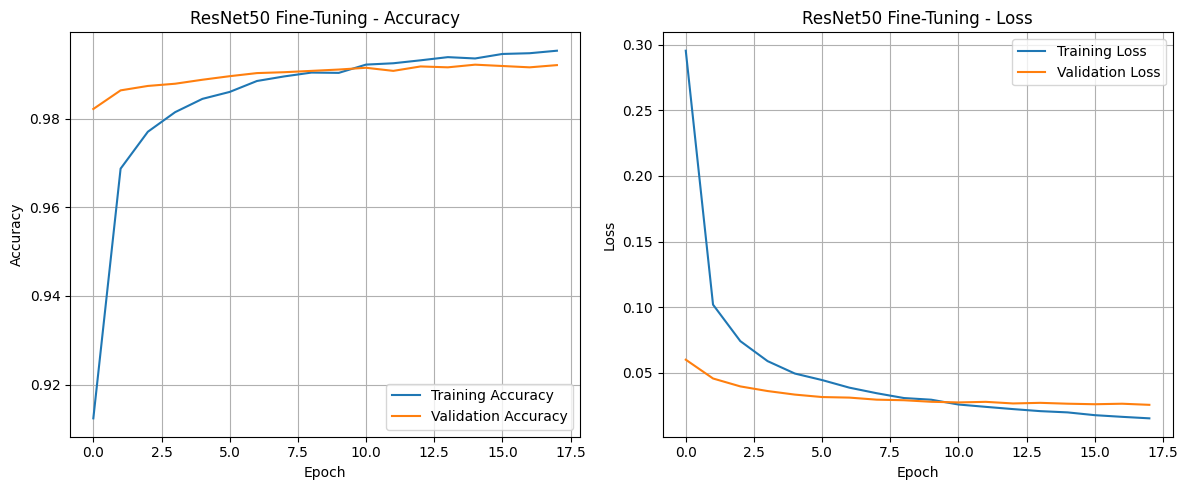

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9898 - loss: 0.0334
ResNet50 Fine-Tuning Test Accuracy: 0.9922
ResNet50 Fine-Tuning Test Loss: 0.0265


In [ ]:
print("\n--- ResNet50: Fine-Tuning (Unfreeze Last Blocks) ---")

fine_tune_model_resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze all layers initially
for layer in fine_tune_model_resnet50_base.layers:
    layer.trainable = False

# Unfreeze specific layers/blocks. For ResNet50, this typically involves `conv5_blockX`
# or starting from a certain layer index.
# Let's unfreeze from 'conv5_block1_0_conv' onwards (i.e., conv5_block1, conv5_block2, conv5_block3 and later if any).
# More robust way: find a specific layer and set layers after it to trainable.
set_trainable = False
for layer in fine_tune_model_resnet50_base.layers:
    if layer.name == 'conv5_block1_out': # This is just before conv5_block2_out and conv5_block3_out
        set_trainable = True # Start unfreezing from this point onwards.
    if set_trainable:
        layer.trainable = True
    # Or, more simply, if you know the naming convention of blocks:
    # if 'conv5_block' in layer.name or 'conv4_block' in layer.name: # Example: unfreeze conv4_block and conv5_block
    #     layer.trainable = True

print("ResNet50 layers trainability after unfreezing:")
for layer in fine_tune_model_resnet50_base.layers:
    print(f"{layer.name}: {layer.trainable}")


# Add new classification head
x = Flatten()(fine_tune_model_resnet50_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model_resnet50_ft = Model(inputs=fine_tune_model_resnet50_base.input, outputs=output, name="ResNet50_MNIST_Fine_Tuning")

# Compile the model with a very low learning rate
optimizer_ft = SGD(learning_rate=1e-5, momentum=0.9)
model_resnet50_ft.compile(optimizer=optimizer_ft,
                          loss=CategoricalCrossentropy(),
                          metrics=['accuracy'])

model_resnet50_ft.summary()

# 2. Training with early stopping
print("\nTraining ResNet50 Fine-Tuning model...")
early_stopping_callback_resnet = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1
)

history_resnet50_ft = model_resnet50_ft.fit(
    train_dataset_resnet50,
    epochs=20, # More epochs, but with early stopping
    validation_data=test_dataset_resnet50,
    callbacks=[early_stopping_callback_resnet]
)

# Output: Training curves
plot_training_history(history_resnet50_ft, "ResNet50 Fine-Tuning")

# Evaluate performance
loss_resnet50_ft, accuracy_resnet50_ft = model_resnet50_ft.evaluate(test_dataset_resnet50)
results['ResNet50_FineTuning'] = {'accuracy': accuracy_resnet50_ft, 'loss': loss_resnet50_ft}
print(f"ResNet50 Fine-Tuning Test Accuracy: {accuracy_resnet50_ft:.4f}")
print(f"ResNet50 Fine-Tuning Test Loss: {loss_resnet50_ft:.4f}")


--- Final Performance Comparison ---
VGG16_FeatureExtraction: Accuracy = 0.9911, Loss = 0.0524
ResNet50_FeatureExtraction: Accuracy = 0.9926, Loss = 0.0385
VGG16_FineTuning: Accuracy = 0.9926, Loss = 0.0257
ResNet50_FineTuning: Accuracy = 0.9922, Loss = 0.0265

Accuracy and Loss Comparison Table:
                            accuracy      loss
VGG16_FeatureExtraction       0.9911  0.052388
ResNet50_FeatureExtraction    0.9926  0.038535
VGG16_FineTuning              0.9926  0.025697
ResNet50_FineTuning           0.9922  0.026461


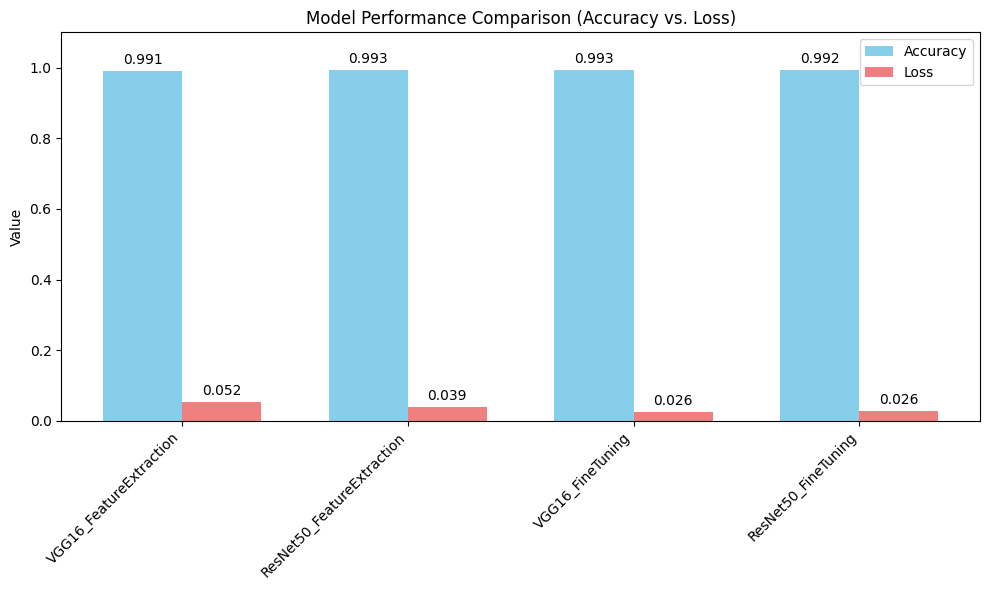

In [ ]:
print("\n--- Final Performance Comparison ---")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, Loss = {metrics['loss']:.4f}")

# You can also use a pandas DataFrame for a cleaner table if you like
import pandas as pd
comparison_df = pd.DataFrame.from_dict(results, orient='index')
print("\nAccuracy and Loss Comparison Table:")
print(comparison_df)

# Visual comparison if desired
labels = list(results.keys())
accuracies = [results[k]['accuracy'] for k in labels]
losses = [results[k]['loss'] for k in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, losses, width, label='Loss', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Model Performance Comparison (Accuracy vs. Loss)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()
ax.set_ylim(0, 1.1) # Max 1.0 for accuracy, slightly more for loss

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()